In [1]:
# explore the scaling range of the robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

In [2]:
# get the dataset
def get_dataset():
    # load dataset
    dataset = read_csv('diabetes.csv', header=0)
    data = dataset.values
    # separate into input and output column
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

In [3]:
# get list of modek evaluate
def get_models():
    models = dict()
    for value in [ 1, 5, 10,15, 20, 25, 30]:
        # define pipeline
        trans = RobustScaler(quantile_range=(value, 100-value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

In [4]:
# evaluate a given model model using cross_validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [5]:
# defien dataset
X, y = get_dataset()

In [6]:
# get to models to evaluate
models = get_models()

In [7]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 1f (0.054)
>5 1f (0.051)
>10 1f (0.047)
>15 1f (0.045)
>20 1f (0.050)
>25 1f (0.044)
>30 1f (0.042)


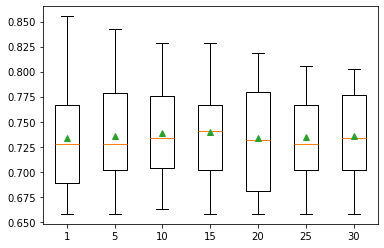

In [8]:
# plot model performance for comparision
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()